In [2]:
import gzip
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.decomposition import FastICA
import numpy as np
from scipy.linalg import svd

from timeit import default_timer as timer

In [2]:
f_pickle = "mnist_32.bnch"
f = gzip.open(f_pickle, mode='rb')
bnch = pickle.load(f)
f.close()

In [3]:
print(bnch.keys())

dict_keys(['DESCR', 'data', 'target', 'data_test', 'target_test'])


In [4]:
print(bnch['DESCR'])

MNIST data set from Lecun site: http://yann.lecun.com/exdb/mnist/


In [5]:
print(bnch['data'].shape)

(60000, 32, 32, 1)


In [6]:
print(bnch['target'].shape)

(60000,)


In [18]:
SAMPLE = 9
NFEAT = 40

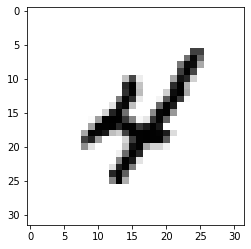

4


In [19]:
# pick a sample to plot
sample = SAMPLE
image = bnch['data'][sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray_r')
plt.show()
print(bnch['target'][sample])

## PCA en MNIST 

In [5]:
start = timer()
data = bnch['data']
N = data.shape[0]
M = data.shape[1]
print(data.shape)
data = np.array(data).reshape(N, M*M)
pca = PCA(n_components=NFEAT)
reduced_data = pca.fit_transform(data)
cov = pca.get_covariance()
recoverPCA = pca.inverse_transform(reduced_data)
recoverPCA = np.array(recoverPCA).reshape(N, M, M, 1)
print(cov.shape)
U, s, VT = svd(cov)
print(s[:NFEAT*2])
end = timer()
print("\nTiempo --> %.2f" % (end - start) + " s")

(60000, 32, 32, 1)


NameError: name 'NFEAT' is not defined

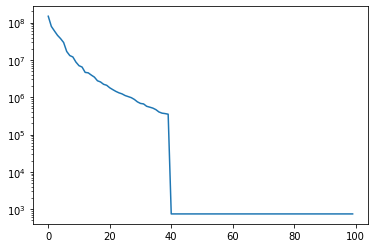

In [39]:
plt.yscale("log")
plt.plot((s[:100]*s[:100])/745)
# Repasar como coger cierto porcentaje de varianza según el nª de autovalores

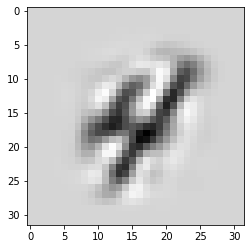

4


In [20]:
# pick a sample to plot
sample = SAMPLE
image = recoverPCA[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray_r')
plt.show()
print(bnch['target'][sample])

## NMF en MNIST

In [22]:
start = timer()
data = bnch['data']
N = data.shape[0]
M = data.shape[1]
data = np.array(data).reshape(N, M*M)
model = NMF(n_components=NFEAT, init='random', random_state=0)
reduced_data = model.fit_transform(data)
recoverNMF = model.inverse_transform(reduced_data)
recoverNMF = np.array(recoverNMF).reshape(N, M, M, 1)
end = timer()
print("\nTiempo --> %.2f" % (end - start) + " s")

/home/man3/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"



Tiempo --> 93.87 s


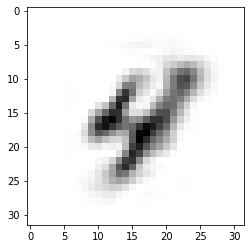

4


In [23]:
# pick a sample to plot
sample = SAMPLE
image = recoverNMF[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray_r')
plt.show()
print(bnch['target'][sample])

## ICA en MNIST

### Arquitectura 1

In [28]:
## Produce imágenes bases estadísticamente independientes

start = timer()
data = bnch['data']
N = data.shape[0]
M = data.shape[1]
data = np.array(data).reshape(N, M*M)
print(data.shape)
transformer = FastICA(n_components=40, random_state=0)
reduced_data = transformer.fit_transform(data)
recoverICA = transformer.inverse_transform(reduced_data)
print(recoverICA.shape)
recoverICA = np.array(recoverICA).reshape(N, M, M, 1)
end = timer()
print("\nTiempo --> %.2f" % (end - start) + " s")

(60000, 1024)
(60000, 1024)

Tiempo --> 36.38 s


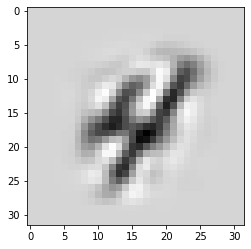

4


In [29]:
# pick a sample to plot
sample = SAMPLE
image = recoverICA[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray_r')
plt.show()
print(bnch['target'][sample])

### Arquitectura 2

In [30]:
## Encuentra una representación en la cual los coeficientes usados para
## codificar las imágenes(los pixeles) son estadísticamente independientes

start = timer()
data = bnch['data']
N = data.shape[0]
M = data.shape[1]
data = np.array(data).reshape(N, M*M)
data = np.transpose(data)
print(data.shape)
transformer = FastICA(n_components=40, random_state=0)
reduced_data = transformer.fit_transform(data)
recoverICA2 = transformer.inverse_transform(reduced_data)
recoverICA2 = np.transpose(recoverICA2)
print(recoverICA2.shape)
recoverICA2 = np.array(recoverICA2).reshape(N, M, M, 1)
end = timer()
print("\nTiempo --> %.2f" % (end - start) + " s")

(1024, 60000)
(60000, 1024)

Tiempo --> 40.61 s


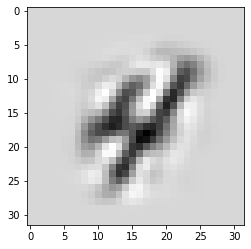

4


In [31]:
# pick a sample to plot
sample = SAMPLE
image = recoverICA2[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray_r')
plt.show()
print(bnch['target'][sample])

PRUEBA 1

In [32]:
start = timer()
data = bnch['data']
N = data.shape[0]
M = data.shape[1]
data = np.array(data).reshape(N, M*M)
print(data.shape)
transformer = FastICA(n_components=40, random_state=0, algorithm='parallel')
reduced_data = transformer.fit_transform(data)
recoverICAP = transformer.inverse_transform(reduced_data)
print(recoverICAP.shape)
recoverICAP = np.array(recoverICAP).reshape(N, M, M, 1)
end = timer()
print("\nTiempo --> %.2f" % (end - start) + " s")

(60000, 1024)
(60000, 1024)

Tiempo --> 44.63 s


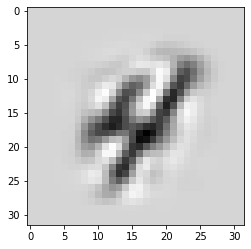

4


In [33]:
# pick a sample to plot
sample = SAMPLE
image = recoverICAP[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray_r')
plt.show()
print(bnch['target'][sample])

PRUEBA 2

In [10]:
start = timer()
data = bnch['data']
N = data.shape[0]
M = data.shape[1]
data = np.array(data).reshape(N, M*M)
print(data.shape)
transformer = FastICA(n_components=40, random_state=0, algorithm='deflation', max_iter=10)
reduced_data = transformer.fit_transform(data)
recoverICAD = transformer.inverse_transform(reduced_data)
print(recoverICAD.shape)
recoverICAD = np.array(recoverICAD).reshape(N, M, M, 1)
end = timer()
print("\nTiempo --> %.2f" % (end - start) + " s")

(60000, 1024)
(60000, 1024)

Tiempo --> 157.68 s


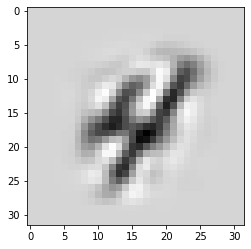

4


In [27]:
# pick a sample to plot
sample = SAMPLE
image = recoverICAD[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray_r')
plt.show()
print(bnch['target'][sample])

SCRIPT PARA EOLO (Este análisis previamente se probará en general y posteriormente se agrupará según el número, el número media?)
- Almacenar la S, autovalores, y sacar la fórmula de la varianza que se pierde.
- Almacenar los datos de cada algoritmo en un diccionario.l número estandar?
    Necesitamos: Tiempo que tarda, ECM y Recover. 

In [ ]:
## Leemos los datos del fichero
f_pickle = "mnist_32.bnch"
f = gzip.open(f_pickle, mode='rb')
bnch = pickle.load(f)
f.close()
data = bnch['data']
N, M = data.shape
data = np.array(data).reshape(N, M*M)

## Calculamos SVD de nuestra BBDD.
U, s, VT = svd(data)
print(s, s.shape)

## Aplicamos PCA
start = timer()
pca = PCA(n_components=NFEAT)
reduced_data = pca.fit_transform(data)
cov = pca.get_covariance()
recoverPCA = pca.inverse_transform(reduced_data)
recoverPCA = np.array(recoverPCA).reshape(N, M, M, 1)
print(cov.shape)
U, s, VT = svd(cov)
print(s[:NFEAT*2]/745)
end = timer()
timePCA = (end - start) 

## Aplicamos NMF
start = timer()
model = NMF(n_components=NFEAT, init='random', random_state=0)
reduced_data = model.fit_transform(data)
recoverNMF = model.inverse_transform(reduced_data)
recoverNMF = np.array(recoverNMF).reshape(N, M, M, 1)
end = timer()
timeNMF = (end - start) 


## Aplicamos ICA
start = timer()
transformer = FastICA(n_components=40, random_state=0)
reduced_data = transformer.fit_transform(data)
recoverICA = transformer.inverse_transform(reduced_data)
print(recoverICA.shape)
recoverICA = np.array(recoverICA).reshape(N, M, M, 1)
end = timer()
timeICA = (end - start) 

In [4]:
## Leemos los datos del fichero
f_pickle = "mnist_32.bnch"
f = gzip.open(f_pickle, mode='rb')
bnch = pickle.load(f)
L = []
for i in range (10):
    L.append([])
print(L)
for j in range(len(bnch['target'])):
    L[bnch['target'][j]].append(bnch['data'][j])
f.close()

[[], [], [], [], [], [], [], [], [], []]


AttributeError: 'list' object has no attribute 'shape'